In [1]:
from nuscenes_utils import *

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 31.164 seconds.
Reverse indexing ...
Done reverse indexing in 7.8 seconds.


In [2]:
scene_num = 1078
s = Scene('scene-%s' % str(scene_num).zfill(4))
s.extract_data()
s.segment_actions()
s.rich_actions

LANE_CHANGE
 index: [ 6 15 ] time: [ 2.9992289999999997 7.500871 ]


[{'label': 'drive straight', 'index': 0, 'time': 0.0},
 {'label': 'accelerate', 'index': 1, 'time': 0.499857},
 {'label': 'drive straight', 'index': 4, 'time': 1.999466},
 {'label': 'decelerate', 'index': 5, 'time': 2.499341},
 {'label': 'change lane', 'index': 6, 'time': 2.9992289999999997},
 {'label': 'drive straight', 'index': 15, 'time': 7.500871},
 {'label': 'decelerate', 'index': 19, 'time': 9.500383},
 {'label': 'drive straight', 'index': 21, 'time': 10.500138999999999},
 {'label': 'decelerate', 'index': 22, 'time': 11.000005999999999},
 {'label': 'drive straight', 'index': 23, 'time': 11.500497},
 {'label': 'decelerate', 'index': 28, 'time': 14.101016999999999},
 {'label': 'drive straight', 'index': 34, 'time': 17.099733},
 {'label': 'END', 'index': 39, 'time': 19.500114}]

In [4]:
s.prim_actions

[{'label': 'drive straight', 'index': 0, 'time': 0.0},
 {'label': 'accelerate', 'index': 1, 'time': 0.499857},
 {'label': 'drive straight', 'index': 4, 'time': 1.999466},
 {'label': 'decelerate', 'index': 5, 'time': 2.499341},
 {'label': 'drive straight', 'index': 6, 'time': 2.9992289999999997},
 {'label': 'accelerate', 'index': 8, 'time': 3.99957},
 {'label': 'drive straight', 'index': 13, 'time': 6.501155},
 {'label': 'decelerate', 'index': 19, 'time': 9.500383},
 {'label': 'drive straight', 'index': 21, 'time': 10.500138999999999},
 {'label': 'decelerate', 'index': 22, 'time': 11.000005999999999},
 {'label': 'drive straight', 'index': 23, 'time': 11.500497},
 {'label': 'decelerate', 'index': 28, 'time': 14.101016999999999},
 {'label': 'drive straight', 'index': 34, 'time': 17.099733},
 {'label': 'END', 'index': 39, 'time': 19.500114}]

[(0.0, 0.499857, 'blue'), (0.499857, 1.999466, 'green'), (1.999466, 2.499341, 'blue'), (2.499341, 2.9992289999999997, 'yellow'), (2.9992289999999997, 7.500871, 'Salmon'), (7.500871, 9.500383, 'blue'), (9.500383, 10.500138999999999, 'yellow'), (10.500138999999999, 11.000005999999999, 'blue'), (11.000005999999999, 11.500497, 'yellow'), (11.500497, 14.101016999999999, 'blue'), (14.101016999999999, 17.099733, 'yellow'), (17.099733, 19.500114, 'blue')]


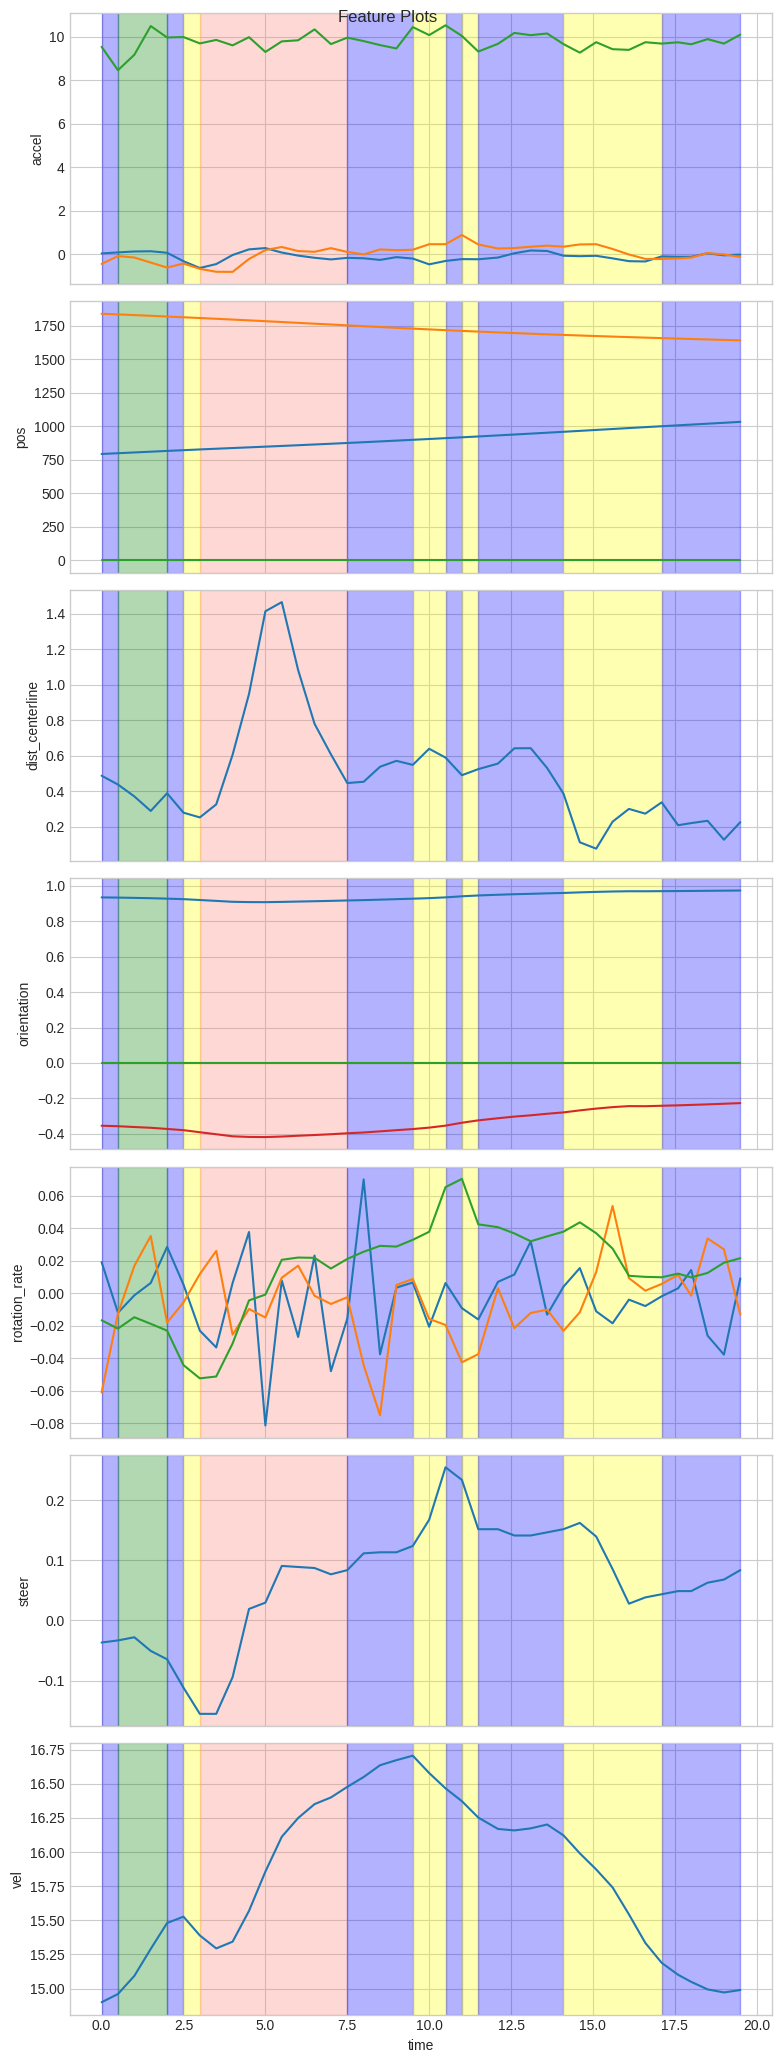

[{'token': 'e54a957358954c2fbec96cd497f19e0b', 'accel': [0.033587032437874434, -0.44898005481922415, 9.542117648722558], 'orientation': [0.9351402215779953, 0.0, 0.0, -0.3542778090525257], 'pos': [793.5440671693995, 1840.4601295984799, 0.0], 'rotation_rate': [0.01910584792494774, -0.0609457865357399, -0.016638953238725662], 'vel': 14.899528204219717, 'steer': -0.036651914291879334, 'dist_centerline': 0.48879362160640855, 'closest_lane': 'ba73260a-a8b9-4117-8d83-5f07377ba46b', 'time': 0.0}, {'token': '20aba38d9282426f8286bf3917bae0be', 'accel': [0.08055947968183713, -0.0871781416040706, 8.466401621200497], 'orientation': [0.9340488306699568, 0.0, 0.0, -0.3571453232566351], 'pos': [799.224217950984, 1835.3962977798528, 0.0], 'rotation_rate': [-0.012018651701509953, -0.012527503073215485, -0.02173756994307041], 'vel': 14.960114123541304, 'steer': -0.03316125578788591, 'dist_centerline': 0.4388302650142436, 'closest_lane': 'ba73260a-a8b9-4117-8d83-5f07377ba46b', 'time': 0.499857}, {'token'

In [3]:
s.plot_actions()
print(s.data)

In [5]:
plt.ioff()
s.render_actions_map('%s.gif' % s.scene_name)
plt.ion()

/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1012: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


In [3]:
scene_names = []
for i in range(2000):
    if i in nusc_can.can_blacklist:
        continue
    scene_name = 'scene-%s' % str(i).zfill(4)
    scene = [ i for i in nusc.scene if scene_name in i['name'].lower() ]
    if len(scene) > 0:
        scene_names.append(scene_name)

scene_names

['scene-0001',
 'scene-0002',
 'scene-0003',
 'scene-0004',
 'scene-0005',
 'scene-0006',
 'scene-0007',
 'scene-0008',
 'scene-0009',
 'scene-0010',
 'scene-0011',
 'scene-0012',
 'scene-0013',
 'scene-0014',
 'scene-0015',
 'scene-0016',
 'scene-0017',
 'scene-0018',
 'scene-0019',
 'scene-0020',
 'scene-0021',
 'scene-0022',
 'scene-0023',
 'scene-0024',
 'scene-0025',
 'scene-0026',
 'scene-0027',
 'scene-0028',
 'scene-0029',
 'scene-0030',
 'scene-0031',
 'scene-0032',
 'scene-0033',
 'scene-0034',
 'scene-0035',
 'scene-0036',
 'scene-0038',
 'scene-0039',
 'scene-0041',
 'scene-0042',
 'scene-0043',
 'scene-0044',
 'scene-0045',
 'scene-0046',
 'scene-0047',
 'scene-0048',
 'scene-0049',
 'scene-0050',
 'scene-0051',
 'scene-0052',
 'scene-0053',
 'scene-0054',
 'scene-0055',
 'scene-0056',
 'scene-0057',
 'scene-0058',
 'scene-0059',
 'scene-0060',
 'scene-0061',
 'scene-0062',
 'scene-0063',
 'scene-0064',
 'scene-0065',
 'scene-0066',
 'scene-0067',
 'scene-0068',
 'scene-00

In [4]:
scenes = []
for scene_name in scene_names:
    s = Scene(scene_name)
    scenes.append(s)
    s.extract_data()
    s.segment_actions()
    print(s.rich_actions)


[{'label': 'turn left', 'index': 0, 'time': 0.0}, {'label': 'accelerate', 'index': 6, 'time': 2.600554}, {'label': 'drive straight', 'index': 10, 'time': 4.4999769999999994}, {'label': 'decelerate', 'index': 11, 'time': 4.999306}, {'label': 'drive straight', 'index': 19, 'time': 9.098956}, {'label': 'accelerate', 'index': 20, 'time': 9.599376}, {'label': 'drive straight', 'index': 29, 'time': 14.099924}, {'label': 'accelerate', 'index': 39, 'time': 18.999703999999998}, {'label': 'END', 'index': 39, 'time': 19.49957}]
[{'label': 'turn left', 'index': 0, 'time': 0.0}, {'label': 'accelerate', 'index': 13, 'time': 6.000712999999999}, {'label': 'drive straight', 'index': 19, 'time': 9.000525}, {'label': 'decelerate', 'index': 21, 'time': 9.949961}, {'label': 'accelerate', 'index': 30, 'time': 14.599253}, {'label': 'END', 'index': 39, 'time': 19.500185}]
[{'label': 'stop', 'index': 0, 'time': 0.0}, {'label': 'accelerate', 'index': 5, 'time': 1.9995049999999999}, {'label': 'drive straight', '

In [ ]:
total = [76, 185, 328, 632, 778, 1089]
valid = [778]
bad = [76, 185, 328, 632, 1089]


uturn_scene = [ i for i in scenes if i.scene_name == 'scene-1089' ][0]
uturn_scene.plot_actions()


In [ ]:
plt.ioff()
uturn_scene.render_actions_map("%s.gif" % uturn_scene.scene_name)